In [4]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
movies = pd.read_csv('Movies.csv', encoding='utf-8-sig')
characters = pd.read_csv('Characters.csv', encoding='latin1')
dialogue = pd.read_csv('Dialogue.csv', encoding='latin1')

In [6]:
print("Filmes:")
print(movies.head())

print("\nPersonagens:")
print(characters.head())

Filmes:
   Movie ID                                Movie Title  Release Year  Runtime  \
0         1   Harry Potter and the Philosopher's Stone          2001      152   
1         2    Harry Potter and the Chamber of Secrets          2002      161   
2         3   Harry Potter and the Prisoner of Azkaban          2004      142   
3         4        Harry Potter and the Goblet of Fire          2005      157   
4         5  Harry Potter and the Order of the Phoenix          2007      138   

          Budget       Box Office  
0  $125,000,000   $1,002,000,000   
1  $100,000,000     $880,300,000   
2  $130,000,000     $796,700,000   
3  $150,000,000     $896,400,000   
4  $150,000,000     $942,000,000   

Personagens:
   Character ID    Character Name                Species  Gender       House  \
0             1      Harry Potter                  Human    Male  Gryffindor   
1             2       Ron Weasley                  Human    Male  Gryffindor   
2             3  Hermione Granger  

In [7]:
print("Estrutura dos dados - Movies:")
movies.info()

print("\nEstrutura dos dados - Characters:")
characters.info()

Estrutura dos dados - Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      8 non-null      int64 
 1   Movie Title   8 non-null      object
 2   Release Year  8 non-null      int64 
 3   Runtime       8 non-null      int64 
 4   Budget        8 non-null      object
 5   Box Office    8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes

Estrutura dos dados - Characters:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null

In [8]:
print("\nFilmes - Linhas e Colunas:", movies.shape)
print("Personagens - Linhas e Colunas:", characters.shape)


Filmes - Linhas e Colunas: (8, 6)
Personagens - Linhas e Colunas: (166, 8)


In [9]:
#padroniza e remove espaços extras
characters['Species'] = characters['Species'].str.strip().str.capitalize()
characters['Gender'] = characters['Gender'].str.strip().str.capitalize()
characters['House'] = characters['House'].str.strip().str.capitalize()

#converte para tipo categórico
characters['Species'] = characters['Species'].astype('category')
characters['Gender'] = characters['Gender'].astype('category')
characters['House'] = characters['House'].astype('category')

In [10]:
movies['Movie Title'] = movies['Movie Title'].astype('category')

In [11]:
#remove $ e , e converte para float
movies['Budget'] = movies['Budget'].replace('[\$,]', '', regex=True).astype(float)
movies['Box Office'] = movies['Box Office'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
print("Filmes:")
print(movies.head())

print("\nPersonagens:")
print(characters.head())

Filmes:
   Movie ID                                Movie Title  Release Year  Runtime  \
0         1   Harry Potter and the Philosopher's Stone          2001      152   
1         2    Harry Potter and the Chamber of Secrets          2002      161   
2         3   Harry Potter and the Prisoner of Azkaban          2004      142   
3         4        Harry Potter and the Goblet of Fire          2005      157   
4         5  Harry Potter and the Order of the Phoenix          2007      138   

        Budget    Box Office  
0  125000000.0  1.002000e+09  
1  100000000.0  8.803000e+08  
2  130000000.0  7.967000e+08  
3  150000000.0  8.964000e+08  
4  150000000.0  9.420000e+08  

Personagens:
   Character ID    Character Name                Species  Gender       House  \
0             1      Harry Potter                  Human    Male  Gryffindor   
1             2       Ron Weasley                  Human    Male  Gryffindor   
2             3  Hermione Granger                  Human  Female 

In [13]:
print(characters.dtypes)

Character ID         int64
Character Name      object
Species           category
Gender            category
House             category
Patronus            object
Wand (Wood)         object
Wand (Core)         object
dtype: object


In [14]:
print(movies.dtypes)

Movie ID           int64
Movie Title     category
Release Year       int64
Runtime            int64
Budget           float64
Box Office       float64
dtype: object


In [15]:
print("Valores ausentes em Characters:")
print(characters.isnull().sum())

print("\nValores ausentes em Movies:")
print(movies.isnull().sum())

Valores ausentes em Characters:
Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

Valores ausentes em Movies:
Movie ID        0
Movie Title     0
Release Year    0
Runtime         0
Budget          0
Box Office      0
dtype: int64


In [16]:
#descritivas
movies.describe()

,Movie ID,Release Year,Runtime,Budget,Box Office
count,8.00000,8.000000,8.000000,8.000000e+00,8.000000e+00
mean,4.50000,2006.125000,147.375000,1.693750e+08,9.724375e+08
std,2.44949,3.720119,10.363914,5.734840e+07,1.623076e+08
min,1.00000,2001.000000,130.000000,1.000000e+08,7.967000e+08
25%,2.75000,2003.500000,141.000000,1.287500e+08,8.923750e+08
50%,4.50000,2006.000000,149.000000,1.500000e+08,9.426000e+08
75%,6.25000,2009.250000,154.000000,2.125000e+08,9.831750e+08
max,8.00000,2011.000000,161.000000,2.500000e+08,1.342000e+09


In [17]:
characters.describe()

,Character ID
count,166.000000
mean,83.500000
std,48.064193
min,1.000000
25%,42.250000
50%,83.500000
75%,124.750000
max,166.000000


In [18]:
#frequência de casas
print(characters['House'].value_counts())

House
Gryffindor                      31
Slytherin                       20
Ravenclaw                       12
Hufflepuff                       8
Durmstrang institute             2
Beauxbatons academy of magic     2
Name: count, dtype: int64


In [19]:
#estatísticas descritivas detalhadas
print("Estatísticas completas:")
print(movies[['Budget', 'Box Office', 'Runtime']].describe())
print(characters['Character ID'].describe())

Estatísticas completas:
             Budget    Box Office     Runtime
count  8.000000e+00  8.000000e+00    8.000000
mean   1.693750e+08  9.724375e+08  147.375000
std    5.734840e+07  1.623076e+08   10.363914
min    1.000000e+08  7.967000e+08  130.000000
25%    1.287500e+08  8.923750e+08  141.000000
50%    1.500000e+08  9.426000e+08  149.000000
75%    2.125000e+08  9.831750e+08  154.000000
max    2.500000e+08  1.342000e+09  161.000000
count    166.000000
mean      83.500000
std       48.064193
min        1.000000
25%       42.250000
50%       83.500000
75%      124.750000
max      166.000000
Name: Character ID, dtype: float64


In [20]:
variaveis = ['Movie ID', 'Release Year', 'Runtime', 'Budget', 'Box Office']
print("Desvio padrão:")
print(movies[variaveis].std())

print("\nQuartis:")
print(movies[variaveis].quantile([0.25, 0.5, 0.75]))

Desvio padrão:
Movie ID        2.449490e+00
Release Year    3.720119e+00
Runtime         1.036391e+01
Budget          5.734840e+07
Box Office      1.623076e+08
dtype: float64

Quartis:
      Movie ID  Release Year  Runtime       Budget   Box Office
0.25      2.75       2003.50    141.0  128750000.0  892375000.0
0.50      4.50       2006.00    149.0  150000000.0  942600000.0
0.75      6.25       2009.25    154.0  212500000.0  983175000.0


In [21]:
print("Desvio padrão (ID dos personagens):")
print(characters['Character ID'].std())

print("\nQuartis (ID dos personagens):")
print(characters['Character ID'].quantile([0.25, 0.5, 0.75]))

Desvio padrão (ID dos personagens):
48.064193186473716

Quartis (ID dos personagens):
0.25     42.25
0.50     83.50
0.75    124.75
Name: Character ID, dtype: float64


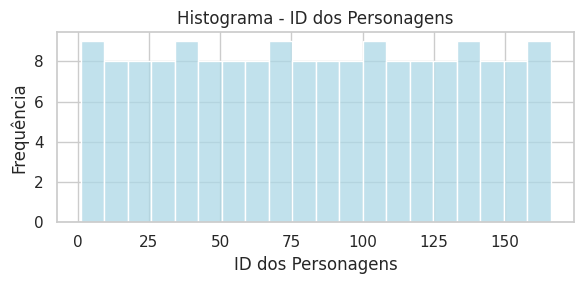

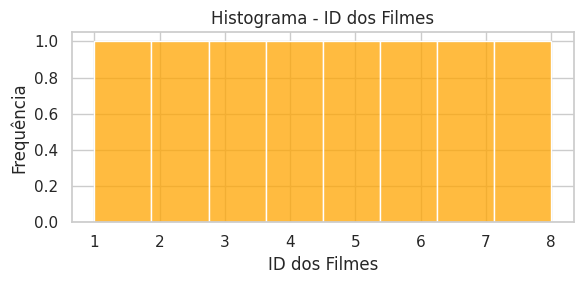

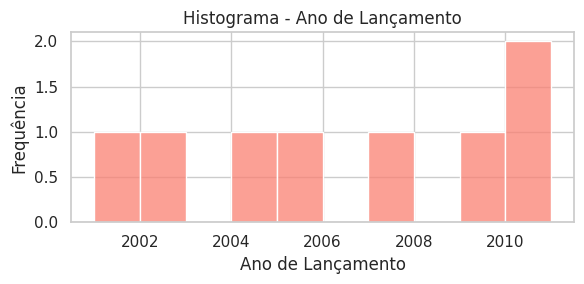

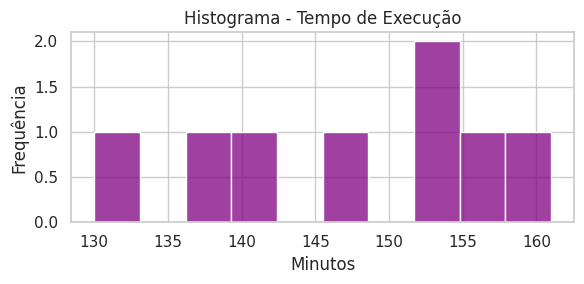

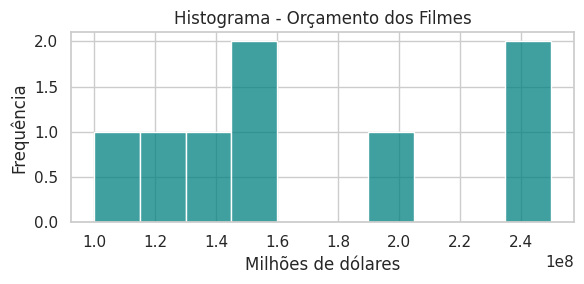

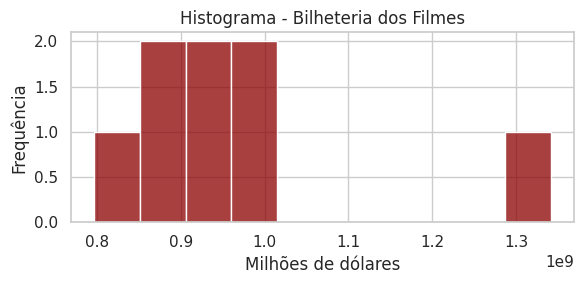

In [22]:
#histogramas em sequência
plt.figure(figsize=(6, 3))
sns.histplot(characters['Character ID'], bins=20, kde=False, color='lightblue')
plt.title('Histograma - ID dos Personagens')
plt.xlabel('ID dos Personagens')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(movies['Movie ID'], bins=8, kde=False, color='orange')
plt.title('Histograma - ID dos Filmes')
plt.xlabel('ID dos Filmes')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(movies['Release Year'], bins=10, kde=False, color='salmon')
plt.title('Histograma - Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(movies['Runtime'], bins=10, kde=False, color='purple')
plt.title('Histograma - Tempo de Execução')
plt.xlabel('Minutos')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(movies['Budget'], bins=10, kde=False, color='teal')
plt.title('Histograma - Orçamento dos Filmes')
plt.xlabel('Milhões de dólares')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(movies['Box Office'], bins=10, kde=False, color='darkred')
plt.title('Histograma - Bilheteria dos Filmes')
plt.xlabel('Milhões de dólares')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

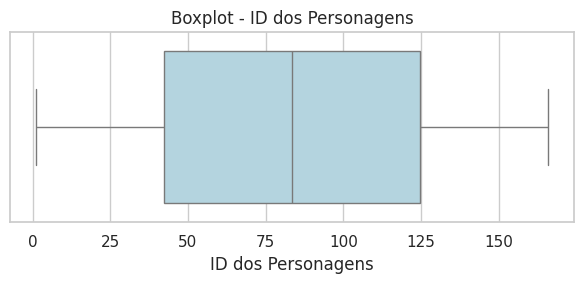

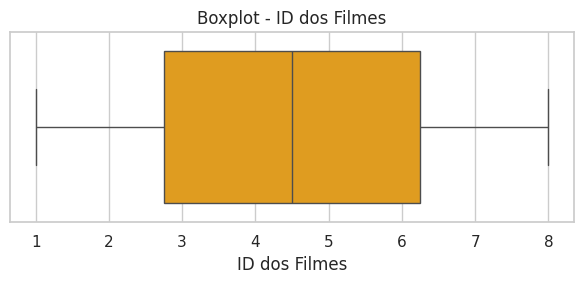

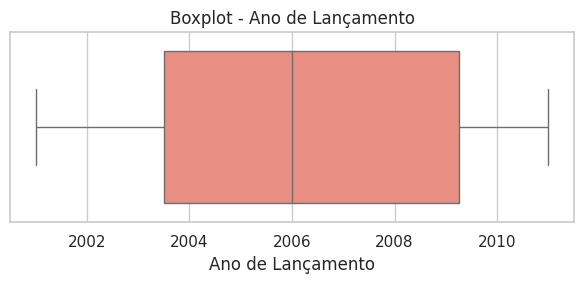

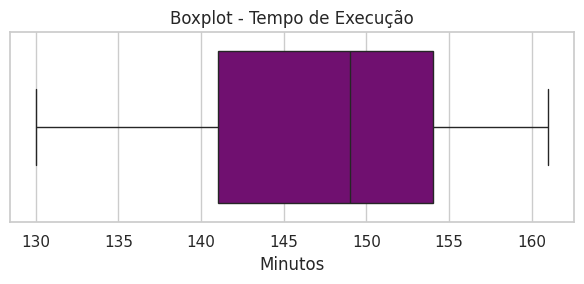

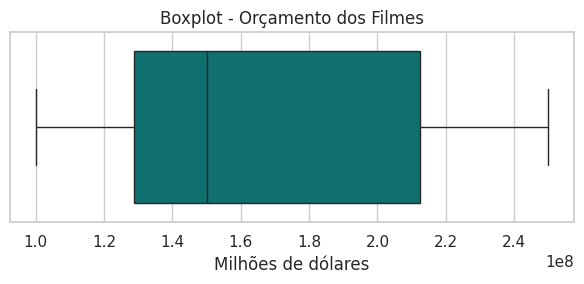

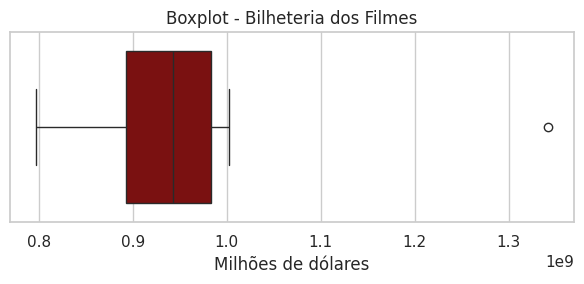

In [23]:
#boxplots em sequência
plt.figure(figsize=(6, 3))
sns.boxplot(x=characters['Character ID'], color='lightblue')
plt.title('Boxplot - ID dos Personagens')
plt.xlabel('ID dos Personagens')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=movies['Movie ID'], color='orange')
plt.title('Boxplot - ID dos Filmes')
plt.xlabel('ID dos Filmes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=movies['Release Year'], color='salmon')
plt.title('Boxplot - Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=movies['Runtime'], color='purple')
plt.title('Boxplot - Tempo de Execução')
plt.xlabel('Minutos')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=movies['Budget'], color='teal')
plt.title('Boxplot - Orçamento dos Filmes')
plt.xlabel('Milhões de dólares')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=movies['Box Office'], color='darkred')
plt.title('Boxplot - Bilheteria dos Filmes')
plt.xlabel('Milhões de dólares')
plt.tight_layout()
plt.show()

Matriz de Correlação (Pearson):
              Movie ID  Release Year   Runtime    Budget  Box Office
Movie ID      1.000000      0.995504 -0.604938  0.882215    0.601528
Release Year  0.995504      1.000000 -0.597940  0.901048    0.566826
Runtime      -0.604938     -0.597940  1.000000 -0.464640   -0.612511
Budget        0.882215      0.901048 -0.464640  1.000000    0.639048
Box Office    0.601528      0.566826 -0.612511  0.639048    1.000000


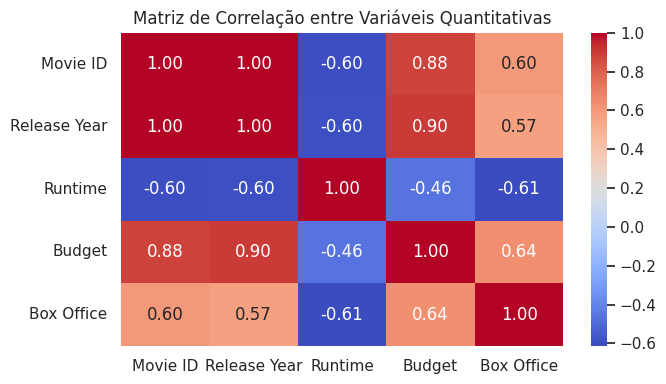

In [24]:
#apenas variáveis numéricas dos filmes
variaveis_numericas = ['Movie ID', 'Release Year', 'Runtime', 'Budget', 'Box Office']

#calcular a correlação de Pearson
correlacoes = movies[variaveis_numericas].corr(method='pearson')

#matriz de correlação
print("Matriz de Correlação (Pearson):")
print(correlacoes)

plt.figure(figsize=(7, 4))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Quantitativas')
plt.tight_layout()
plt.show()

In [25]:
#regressão linear
#as variáveis independentes e dependente
X = movies[['Budget', 'Runtime', 'Release Year']]  #variáveis explicativas
y = movies['Box Office']  #variável resposta

#adiciona constante (intercepto)
X = sm.add_constant(X)

#ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

#mostrar o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Box Office   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     1.842
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.280
Time:                        22:23:35   Log-Likelihood:                -158.59
No. Observations:                   8   AIC:                             325.2
Df Residuals:                       4   BIC:                             325.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.004e+10   7.41e+10      0.676   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


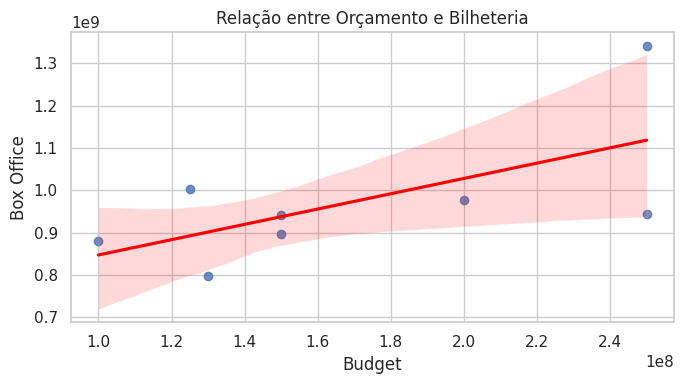

In [26]:
#visualizar a relação entre budget e box office
plt.figure(figsize=(7, 4))
sns.regplot(x=movies['Budget'], y=movies['Box Office'], line_kws={"color": "red"})
plt.title('Relação entre Orçamento e Bilheteria')
plt.xlabel('Budget')
plt.ylabel('Box Office')
plt.tight_layout()
plt.show()

In [27]:
#hipótese 1: diferença no tempo de fala entre homens e mulheres

dialogue['WordCount'] = dialogue['Dialogue'].str.split().str.len()

words_per_character = dialogue.groupby('Character ID')['WordCount'].sum().reset_index()

merged = pd.merge(words_per_character, characters[['Character ID', 'Gender']], on='Character ID')

male = merged[merged['Gender'] == 'Male']['WordCount'].dropna()
female = merged[merged['Gender'] == 'Female']['WordCount'].dropna()

from scipy import stats
t_stat, p_value = stats.ttest_ind(male, female)

print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

t = 0.958, p = 0.340


In [28]:
#hipótese 2: diferença no número de palavras faladas entre casas
dialogue['WordCount'] = dialogue['Dialogue'].str.split().str.len()

words_per_character = dialogue.groupby('Character ID')['WordCount'].sum().reset_index()

merged = pd.merge(words_per_character, characters[['Character ID', 'House']], on='Character ID')

merged = merged.dropna(subset=['House'])

houses = merged['House'].unique()
word_counts_by_house = [merged[merged['House'] == house]['WordCount'] for house in houses]

#teste ANOVA
f_stat, p_value = stats.f_oneway(*word_counts_by_house)

print(f"F = {f_stat:.3f}, p = {p_value:.3f}")

F = 1.399, p = 0.236


In [29]:
#hipótese 3: Diferença no número de palavras faladas entre espécies (Species)

dialogue['WordCount'] = dialogue['Dialogue'].str.split().str.len()

words_per_character = dialogue.groupby('Character ID')['WordCount'].sum().reset_index()

merged = pd.merge(words_per_character, characters[['Character ID', 'Species']], on='Character ID')

merged = merged.dropna(subset=['Species'])

species_grupos = merged['Species'].unique()
grupos = [merged[merged['Species'] == sp]['WordCount'] for sp in species_grupos]

#teste ANOVA
f_stat, p_value = stats.f_oneway(*grupos)

print(f"F = {f_stat:.3f}, p = {p_value:.3f}")

F = 0.181, p = 0.999
